In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path = "computage/models_library/ModelsDescription(upd20240805).csv"

with open(file_path, 'r') as models_file:
    models_data = pd.read_csv(models_file)

In [3]:
models_data.head()

,Name,Species,TrainingTissue,FirstAuthor,Year,N_features,ModelType,Output,PMID,FileName,CoefsSourceURL,Biolearn,methylCIPHER,methylclock,pyaging
0,Horvath2013,Homo sapiens,Multi-tissue,"Horvath, S.",2013,353,"Linear model, ElacticNet",Age (years),24138928,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,1,1,1,1
1,Horvath2013_Shrunken,Homo sapiens,Multi-tissue,"Horvath, S.",2013,110,"Linear model, ElacticNet",Age (years),24138928,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,0,0,0,0
2,Lin2016Blood_99CpGs,Homo sapiens,Blood,"Lin, Q. et al.",2016,99,Linear model,Age (years),26928272,NaN,https://www.aging-us.com/article/100908/supple...,1,1,0,1
3,Lin2016Blood_3CpGs,Homo sapiens,Blood,"Lin, Q. et al.",2016,3,Linear model,Age (years),26928272,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,0,0,0,0
4,PhenoAge2018,Homo sapiens,Blood,"Levine, M.E. et al.",2018,513,"Linear model, ElacticNet",Age (years),29676998,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,1,1,1,1


### Predicted params

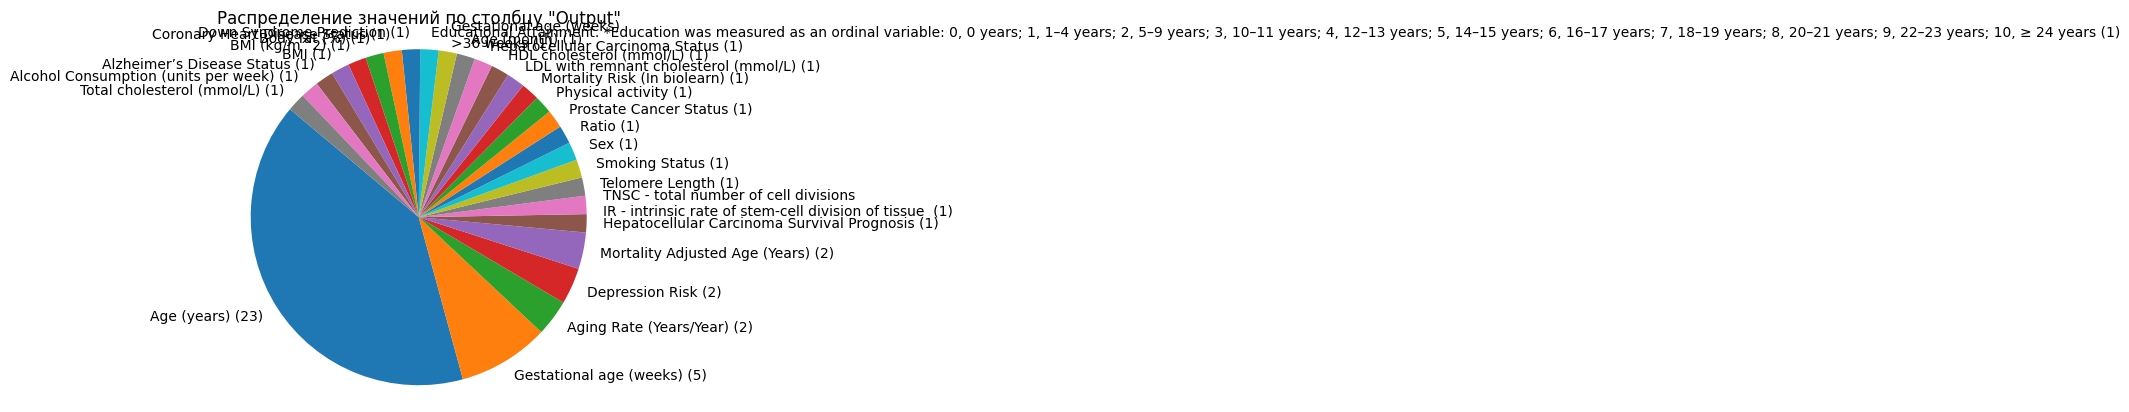

In [4]:
output_counts = models_data['Output'].value_counts()

plt.pie(output_counts, labels=[f'{label} ({count})' for label, count in zip(output_counts.index, output_counts)], autopct='', startangle=140)
plt.axis('equal')

plt.title('Распределение значений по столбцу "Output"')
plt.show()

In [5]:
set(models_data['Output'].values)

{'Age (month)',
 'Age (years)',
 'Aging Rate (Years/Year)',
 'Alcohol Consumption (units per week)',
 'Alzheimer’s Disease Status',
 'BMI',
 'BMI (kg/m^2)',
 'Body fat (%)',
 'Coronary Heart Disease Status',
 'Depression Risk',
 'Down Syndrome Prediction',
 'Educational Attainment. *Education was measured as an ordinal variable: 0, 0 years; 1, 1–4 years; 2, 5–9 years; 3, 10–11 years; 4, 12–13 years; 5, 14–15 years; 6, 16–17 years; 7, 18–19 years; 8, 20–21 years; 9, 22–23 years; 10, ≥ 24 years',
 'Gestational age (weeks)',
 'Gestational age (weeks) \n>36 weeks',
 'HDL cholesterol (mmol/L)',
 'Hepatocellular Carcinoma Status',
 'Hepatocellular Carcinoma Survival Prognosis',
 'LDL with remnant cholesterol (mmol/L)',
 'Mortality Adjusted Age (Years)',
 'Mortality Risk (In biolearn)',
 'Physical activity',
 'Prostate Cancer Status',
 'Ratio',
 'Sex',
 'Smoking Status',
 'TNSC - total number of cell divisions\nIR - intrinsic rate of stem-cell division of tissue ',
 'Telomere Length',
 'Total

In [6]:
prediction_replacements = {'Age (month)': 'Age',
                'Age (years)': 'Age',
                'Aging Rate (Years/Year)': 'Aging Rate',
                "Alzheimer’s Disease Status": 'Disease status',
                'Alcohol Consumption (units per week)':  'Alcohol Consumption',
                'BMI': 'Body parameters',
                'BMI (kg/m^2)': 'Body parameters',
                'Body fat (%)': 'Body parameters',
                'Coronary Heart Disease Status': 'Disease status',
                'Depression Risk': 'Disease risk',
                'Down Syndrome Prediction' : 'Disease status',
                'Educational Attainment. *Education was measured as an ordinal variable: 0, 0 years; 1, 1–4 years; 2, 5–9 years; 3, 10–11 years; 4, 12–13 years; 5, 14–15 years; 6, 16–17 years; 7, 18–19 years; 8, 20–21 years; 9, 22–23 years; 10, ≥ 24 years': 'Education status',
                'Gestational age (weeks)': 'Gestational age',
                'Gestational age (weeks) \n>36 weeks': 'Gestational age',
                'HDL cholesterol (mmol/L)': 'Body parameters',
                'Hepatocellular Carcinoma Status': 'Disease status',
                'Hepatocellular Carcinoma Survival Prognosis': 'Survival prognosis',
                'LDL with remnant cholesterol (mmol/L)': 'Body parameters',
                'Mortality Adjusted Age (Years)': 'Mortality Adjusted Age',
                'Mortality Risk (In biolearn)': 'Mortality Risk',
                'Physical activity': 'Physical activity',
                'Prostate Cancer Status': 'Disease status',
                'Ratio': 'Body parameters',
                'Sex': 'Sex',
                'Smoking Status': 'Smoking Status',
                'TNSC - total number of cell divisions\nIR - intrinsic rate of stem-cell division of tissue ': 'Aging Rate',
                'Telomere Length': 'Telomere Length',
                'Total cholesterol (mmol/L)': 'Body parameters'}

In [7]:
models_data['Modified_Output'] = models_data['Output']

def replace_cell_content(df, column_name, old_content, new_content):
    df['Modified_Output'] = df['Modified_Output'].replace(old_content, new_content)

for old, new in prediction_replacements.items():
    replace_cell_content(models_data, 'Modified_Output', old, new)

set(models_data['Modified_Output'].values)

{'Age',
 'Aging Rate',
 'Alcohol Consumption',
 'Body parameters',
 'Disease risk',
 'Disease status',
 'Education status',
 'Gestational age',
 'Mortality Adjusted Age',
 'Mortality Risk',
 'Physical activity',
 'Sex',
 'Smoking Status',
 'Survival prognosis',
 'Telomere Length'}

In [8]:
models_data.sample()

,Name,Species,TrainingTissue,FirstAuthor,Year,N_features,ModelType,Output,PMID,FileName,CoefsSourceURL,Biolearn,methylCIPHER,methylclock,pyaging,Modified_Output
26,McCartney2018Blood_Alcohol,Homo sapiens,Blood,"McCartney, D.L et al.",2018,450,"Linear model, LASSO",Alcohol Consumption (units per week),30257690,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,1,1,0,0,Alcohol Consumption


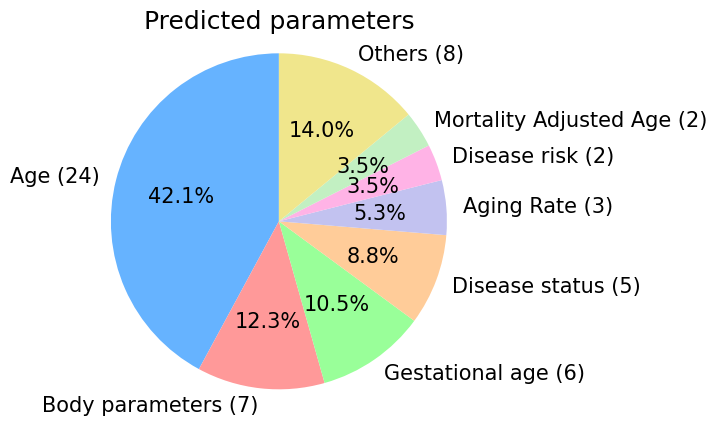

In [9]:
output_counts = models_data['Modified_Output'].value_counts()
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#F0E68C', '#ffb366']
font = {'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
# TOP popular types
n_show = 7
top_categories = output_counts.head(n_show)
others_count = output_counts.sum() - top_categories.sum()
top_categories['Others'] = others_count

plt.pie(top_categories, labels=[f'{label} ({count})' for label, count in zip(top_categories.index, top_categories)], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Predicted parameters')
plt.show()

# cleaning
models_data.drop('Modified_Output', axis=1, inplace=True)

### TrainingTissue

In [10]:
models_data[models_data['TrainingTissue'] == 'Multi-tissue']

,Name,Species,TrainingTissue,FirstAuthor,Year,N_features,ModelType,Output,PMID,FileName,CoefsSourceURL,Biolearn,methylCIPHER,methylclock,pyaging
0,Horvath2013,Homo sapiens,Multi-tissue,"Horvath, S.",2013,353,"Linear model, ElacticNet",Age (years),24138928,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,1,1,1,1
1,Horvath2013_Shrunken,Homo sapiens,Multi-tissue,"Horvath, S.",2013,110,"Linear model, ElacticNet",Age (years),24138928,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,0,0,0,0
18,Thompson2018Multi-tissue,Mus musculus,Multi-tissue,"Thompson, M.J. et al.",2018,582,"Linear model, ElacticNet",Age (month),30348905,NaN,https://www.aging-us.com/article/101590/supple...,0,0,0,1


In [11]:
tissues = pd.DataFrame((models_data['TrainingTissue'].value_counts()))
tissues.reset_index(inplace=True)
tissues

,TrainingTissue,count
0,Blood,34
1,Placenta,5
2,"Blood, Saliva",4
3,Multi-tissue,3
4,Cord Blood,2
5,Skin + blood,1
6,Lung,1
7,Breast,1
8,Kidney,1
9,"Buccal, pediatric samples (0-20 old)",1


In [12]:
tissues_list = ['Placenta', 'Saliva', 'Multi-tissue', 'Cord Blood', 'Skin', 'Lung', 'Breast', 'Kidney',  'Buccal', 'Brain', 'Prostate', 'Adipose']

tissues.loc[tissues['TrainingTissue'].str.contains('Blood|blood', case=False), 'Blood'] = tissues['count']  
tissues.loc[tissues['TrainingTissue'] == 'Cord Blood', 'Blood'] = False # replace coord blood to False

for tissue_type in tissues_list:
    tissues.loc[tissues['TrainingTissue'].str.contains(tissue_type, case=False), tissue_type] = tissues['count']

tissues

/tmp/ipykernel_2462697/3500258718.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tissues.loc[tissues['TrainingTissue'] == 'Cord Blood', 'Blood'] = False # replace coord blood to False


,TrainingTissue,count,Blood,Placenta,Saliva,Multi-tissue,Cord Blood,Skin,Lung,Breast,Kidney,Buccal,Brain,Prostate,Adipose
0,Blood,34,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Placenta,5,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Blood, Saliva",4,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Multi-tissue,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cord Blood,2,False,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Skin + blood,1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Lung,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Breast,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,Kidney,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,"Buccal, pediatric samples (0-20 old)",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [13]:
tissues_wo_count = tissues.drop(columns=['TrainingTissue', 'count'])
tissue_rate = pd.DataFrame(tissues_wo_count.sum())
tissue_rate.reset_index(inplace=True)
tissue_rate.columns = ['TrainingTissue', 'count']
tissue_rate

,TrainingTissue,count
0,Blood,41.0
1,Placenta,5.0
2,Saliva,4.0
3,Multi-tissue,4.0
4,Cord Blood,2.0
5,Skin,1.0
6,Lung,1.0
7,Breast,1.0
8,Kidney,1.0
9,Buccal,1.0


In [14]:
# Some code to save table into img (failed)

# from pandas.plotting import table 
# ax = plt.subplot(111, frame_on=False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# table(ax, tissue_rate)
# plt.savefig('test_mytable.png')

In [15]:
# TOP popular types
n_show = 5
top_categories = tissue_rate.head(n_show)
other_categories = tissue_rate.iloc[n_show: , :]
other_categories = pd.DataFrame(['Other', other_categories['count'].sum()]).T
other_categories.columns = ['TrainingTissue', 'count']

tissue_rate = pd.concat([top_categories, other_categories], ignore_index=True)
tissue_rate

,TrainingTissue,count
0,Blood,41.0
1,Placenta,5.0
2,Saliva,4.0
3,Multi-tissue,4.0
4,Cord Blood,2.0
5,Other,8.0


In [16]:
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#F0E68C', '#ffb366']

labels = list(tissue_rate['TrainingTissue'])
data = list(tissue_rate['count'])

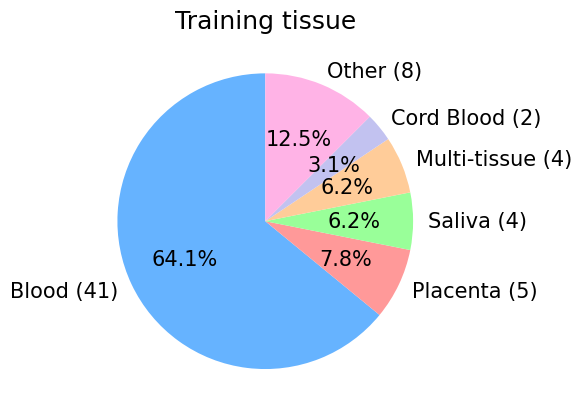

In [17]:
# Bad idea because of repeats
plt.pie(data, labels=[f'{label} ({int(count)})' for label, count in zip(labels, data)], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Training tissue')
plt.show()

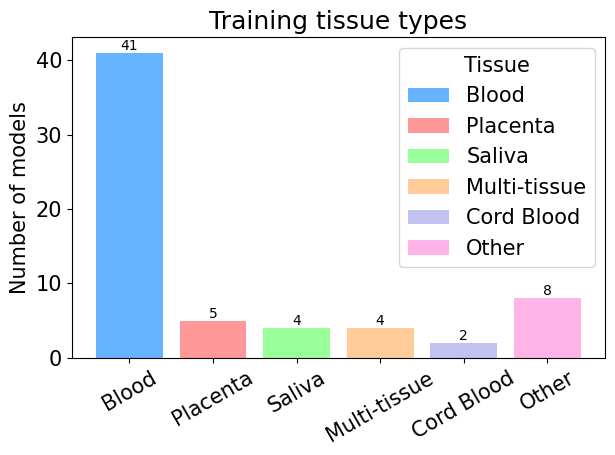

In [18]:
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#F0E68C', '#ffb366']
t_types = list(tissue_rate['TrainingTissue'])
counts = list(tissue_rate['count'])

fig, ax = plt.subplots()

ax.bar(t_types, counts, label=t_types, color=colors)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylabel('Number of models')
ax.set_title('Training tissue types')
ax.legend(title='Tissue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()